# Project Description:

Domain –Travel Aggregator Analysis

Scenario:

Travelling has significantly changed thanks to technology. In the earlier days, it was not easy to travel as booking journeys used to be a hassle, where people needed to contact travel agents, get prices and then do a lot of paperwork.But, with the advent of online apps, it becomes easier to book tickets. However, one challenge is  still  there:  Due  to  many  available  apps  which  offer  bookings,  there  can  be  a  lot  of comparisons for getting the best price

Business Requirement:

A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra,  MMT,  Goibibo).  It  helps  the  user  compare  prices  for  their  upcoming  journeys  on  its platform and the customer is redirected to the desired platform after looking at the price. However, they need to do a lot of analysis of the data which they have collected over a while. As a  newly hired analyst and proficiency in python, your role is to help them perform an in-depth analysis

Objective: Please write an python script to provide answers for the following questions

1.Find the number of distinct bookings and sessions from the given datasets.

2.How many sessions have more than one booking

3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

4.For each of the service names,display the total number of bookings and the total Gross Booking Value in INR

5.For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

6.Which are the top 3 departure cities from where customers book mostly in advance,provided that there have been at least 5 departures from that city?

7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

8.For each service, which is the most used device type for making bookings on the platform?

9.Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

10.Consider the following example:

12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total. searches=100 bookings=10 customers=12The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:

•What is the average oBSR for each month of the year?

•What is the average oBSR for each day of the week?

•Plot a time series of oBSR on all the given dates.

Data Description: Please provide answers to the following questions with Python script

1.Find the number of distinct bookings, and sessions from the given datasets.

2.How many sessions have more than one booking

3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

4.For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

5.For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

6.Which are the top 3 departure cities from where customers book mostly in advance, ifthere have been at least 5 departures from that city?

7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

8.For each service, which is the most used device type for making bookings on the platform?

9.Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

### **Step 1:- Importing Libraries and Loading Datasets:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Bookings datasets:-
bookings_df=pd.read_csv("Bookings.csv")
bookings_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [2]:
bookings_df.shape

(339, 13)

In [3]:
bookings_df.columns

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km'],
      dtype='object')

In [4]:
bookings_df.info() # returns detailed info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [5]:
bookings_df.describe() #returns statistical info of dataset.

,INR_Amount,no_of_passengers,days_to_departure,distance_km
count,339.000000,339.000000,339.000000,339.000000
mean,29327.460708,1.247788,22.348083,4574.309735
std,28148.851152,0.557854,36.412208,3119.033980
min,1402.400000,1.000000,0.000000,206.800000
25%,7237.530000,1.000000,3.000000,1125.800000
50%,23209.600000,1.000000,9.000000,6059.100000
75%,39669.200000,1.000000,24.500000,6867.850000
max,216646.400000,4.000000,311.000000,16520.300000


In [6]:
#Loading Sessions Dataset:-
sessions_df=pd.read_csv("Sessions.csv")
sessions_df.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


- ***Note:-
 There are NaN values under booking_id in sessions dataset.***

In [7]:
sessions_df.shape

(1497, 5)

In [8]:
sessions_df.columns

Index(['session_id', 'search_id', 'search_time', 'session_starting_time',
       'booking_id'],
      dtype='object')

In [9]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [10]:
sessions_df.describe() # returns statistical info of the dataset.

,session_id,search_id,search_time,session_starting_time,booking_id
count,1497,1497,1497,1497,366
unique,331,1360,1357,333,338
top,session_118,search_569,2020-05-20T13:42:32Z,2018-10-11T12:38:29.186Z,booking_63
freq,70,8,8,70,2


## ***Step 2:- Data Cleaning***

- **Drop Duplicates From both Datasets if present:**

In [11]:
# Check for Duplicates:
bookings_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
334    False
335    False
336    False
337    False
338    False
Length: 339, dtype: bool

In [12]:
sessions_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1492    False
1493    False
1494    False
1495    False
1496    False
Length: 1497, dtype: bool

- ***There are no duplicates found in both datasets.***

In [13]:
bookings_df=bookings_df.drop_duplicates()
bookings_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [14]:
sessions_df= sessions_df.drop_duplicates()
sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


- **Dealing With Missing Values**

In [15]:
#Checking Null values on bookings dataset:
bookings_df.isnull().sum()

customer_id          0
booking_id           0
from_city            0
from_country         0
to_city              0
to_country           0
booking_time         0
device_type_used     0
INR_Amount           0
service_name         0
no_of_passengers     0
days_to_departure    0
distance_km          0
dtype: int64

- ***There are no null/NaN values found in bookings dataset.***

In [16]:
sessions_df.isnull().sum()

session_id                  0
search_id                   0
search_time                 0
session_starting_time       0
booking_id               1066
dtype: int64

- ***There are 1066 NaN values found in booking_id of
 sessions dataset.***

In [17]:
sessions_df.shape

(1405, 5)

In [18]:
#Dropping Missing values:
new_sessions_df=sessions_df.dropna()#dropping/removing NaN values
new_sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282
13,session_229,search_695,2019-09-07T22:29:05.439Z,2019-09-07T22:00:05Z,booking_240
...,...,...,...,...,...
1479,session_230,search_728,2020-09-24T06:51:44Z,2020-09-24T06:46:29Z,booking_35
1480,session_190,search_215,2020-03-19T01:25:22.092Z,2020-03-19T01:23:29.288Z,booking_284
1485,session_250,search_579,2020-03-19T09:09:38.901Z,2020-03-19T09:10:07.496Z,booking_26
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120


In [19]:
bookings_df.shape

(339, 13)

In [20]:
# Resetting index of session_df dataset
new_sessions_df=new_sessions_df.reset_index()
new_sessions_df

,index,session_id,search_id,search_time,session_starting_time,booking_id
0,5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
1,6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
2,7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
3,9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282
4,13,session_229,search_695,2019-09-07T22:29:05.439Z,2019-09-07T22:00:05Z,booking_240
...,...,...,...,...,...,...
334,1479,session_230,search_728,2020-09-24T06:51:44Z,2020-09-24T06:46:29Z,booking_35
335,1480,session_190,search_215,2020-03-19T01:25:22.092Z,2020-03-19T01:23:29.288Z,booking_284
336,1485,session_250,search_579,2020-03-19T09:09:38.901Z,2020-03-19T09:10:07.496Z,booking_26
337,1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120


In [21]:
new_sessions_df= new_sessions_df.drop('index',axis=1)
new_sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
1,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
2,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
3,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282
4,session_229,search_695,2019-09-07T22:29:05.439Z,2019-09-07T22:00:05Z,booking_240
...,...,...,...,...,...
334,session_230,search_728,2020-09-24T06:51:44Z,2020-09-24T06:46:29Z,booking_35
335,session_190,search_215,2020-03-19T01:25:22.092Z,2020-03-19T01:23:29.288Z,booking_284
336,session_250,search_579,2020-03-19T09:09:38.901Z,2020-03-19T09:10:07.496Z,booking_26
337,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120


In [22]:
# cheching Datatypes:
bookings_df.dtypes

customer_id           object
booking_id            object
from_city             object
from_country          object
to_city               object
to_country            object
booking_time          object
device_type_used      object
INR_Amount           float64
service_name          object
no_of_passengers     float64
days_to_departure    float64
distance_km          float64
dtype: object

- ***Need to change booking_time dtype-object to datetime format***

In [23]:
new_sessions_df.dtypes

session_id               object
search_id                object
search_time              object
session_starting_time    object
booking_id               object
dtype: object

- ***Change session_starting_time & search_time dtype object to datetime:***

In [24]:
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])
bookings_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14 14:20:20+00:00,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56+00:00,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35+00:00,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28+00:00,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [25]:
bookings_df.dtypes

customer_id                       object
booking_id                        object
from_city                         object
from_country                      object
to_city                           object
to_country                        object
booking_time         datetime64[ns, UTC]
device_type_used                  object
INR_Amount                       float64
service_name                      object
no_of_passengers                 float64
days_to_departure                float64
distance_km                      float64
dtype: object

In [26]:
new_sessions_df.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
1,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
2,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
3,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282
4,session_229,search_695,2019-09-07T22:29:05.439Z,2019-09-07T22:00:05Z,booking_240


In [27]:
new_sessions_df.dtypes

session_id               object
search_id                object
search_time              object
session_starting_time    object
booking_id               object
dtype: object

In [28]:
#new_sessions_df['search_time']=pd.to_datetime(new_sessions_df['search_time'])
#new_sessions_df
new_sessions_df['session_starting_time'] = pd.to_datetime(new_sessions_df['session_starting_time'], errors='coerce')
new_sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21 21:10:12+00:00,booking_54
1,session_283,search_880,2020-01-21T05:33:48.061Z,NaT,booking_106
2,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05 09:04:32+00:00,booking_1
3,session_52,search_1110,2020-01-20T17:03:52.145Z,NaT,booking_282
4,session_229,search_695,2019-09-07T22:29:05.439Z,2019-09-07 22:00:05+00:00,booking_240
...,...,...,...,...,...
334,session_230,search_728,2020-09-24T06:51:44Z,2020-09-24 06:46:29+00:00,booking_35
335,session_190,search_215,2020-03-19T01:25:22.092Z,NaT,booking_284
336,session_250,search_579,2020-03-19T09:09:38.901Z,NaT,booking_26
337,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18 22:45:56+00:00,booking_120


In [29]:
new_sessions_df['search_time'] = pd.to_datetime(new_sessions_df['search_time'], errors='coerce')
new_sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_506,2020-01-21 21:10:58.482000+00:00,2020-01-21 21:10:12+00:00,booking_54
1,session_283,search_880,2020-01-21 05:33:48.061000+00:00,NaT,booking_106
2,session_194,search_312,2019-09-05 09:04:40.423000+00:00,2019-09-05 09:04:32+00:00,booking_1
3,session_52,search_1110,2020-01-20 17:03:52.145000+00:00,NaT,booking_282
4,session_229,search_695,2019-09-07 22:29:05.439000+00:00,2019-09-07 22:00:05+00:00,booking_240
...,...,...,...,...,...
334,session_230,search_728,NaT,2020-09-24 06:46:29+00:00,booking_35
335,session_190,search_215,2020-03-19 01:25:22.092000+00:00,NaT,booking_284
336,session_250,search_579,2020-03-19 09:09:38.901000+00:00,NaT,booking_26
337,session_150,search_156,2018-12-18 22:59:43.764000+00:00,2018-12-18 22:45:56+00:00,booking_120


In [30]:
bookings_df.dtypes

customer_id                       object
booking_id                        object
from_city                         object
from_country                      object
to_city                           object
to_country                        object
booking_time         datetime64[ns, UTC]
device_type_used                  object
INR_Amount                       float64
service_name                      object
no_of_passengers                 float64
days_to_departure                float64
distance_km                      float64
dtype: object

In [31]:
new_sessions_df.dtypes

session_id                            object
search_id                             object
search_time              datetime64[ns, UTC]
session_starting_time    datetime64[ns, UTC]
booking_id                            object
dtype: object

In [32]:
new_sessions_df.isnull().sum()

session_id                 0
search_id                  0
search_time              151
session_starting_time    176
booking_id                 0
dtype: int64


***Note:- session_starting_time column has 176 NaT values and search_time has 151 NaT values***

In [33]:
#Remove NaT values session_starting_time from sessions_df 
#new_sessions_df = new_sessions_df.dropna(subset=['session_starting_time','search_time'],axis=1)
#new_sessions_df
new_sessions_df =new_sessions_df.dropna(subset=['search_time'])
new_sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_506,2020-01-21 21:10:58.482000+00:00,2020-01-21 21:10:12+00:00,booking_54
1,session_283,search_880,2020-01-21 05:33:48.061000+00:00,NaT,booking_106
2,session_194,search_312,2019-09-05 09:04:40.423000+00:00,2019-09-05 09:04:32+00:00,booking_1
3,session_52,search_1110,2020-01-20 17:03:52.145000+00:00,NaT,booking_282
4,session_229,search_695,2019-09-07 22:29:05.439000+00:00,2019-09-07 22:00:05+00:00,booking_240
...,...,...,...,...,...
332,session_249,search_1079,2019-07-25 09:53:40.341000+00:00,2019-07-25 09:23:49+00:00,booking_233
333,session_75,search_203,2019-07-25 19:39:40.210000+00:00,NaT,booking_93
335,session_190,search_215,2020-03-19 01:25:22.092000+00:00,NaT,booking_284
336,session_250,search_579,2020-03-19 09:09:38.901000+00:00,NaT,booking_26


In [34]:
#Remove rows with NaT in the 'search_time' column of sessions_df:
new_sessions_df =new_sessions_df.dropna(subset=['session_starting_time'])
new_sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_506,2020-01-21 21:10:58.482000+00:00,2020-01-21 21:10:12+00:00,booking_54
2,session_194,search_312,2019-09-05 09:04:40.423000+00:00,2019-09-05 09:04:32+00:00,booking_1
4,session_229,search_695,2019-09-07 22:29:05.439000+00:00,2019-09-07 22:00:05+00:00,booking_240
10,session_285,search_216,2019-09-03 17:29:53.394000+00:00,2019-09-03 17:29:39+00:00,booking_34
14,session_160,search_451,2020-01-26 13:35:35.117000+00:00,2020-01-26 12:56:26+00:00,booking_190
...,...,...,...,...,...
310,session_161,search_1147,2020-02-04 18:37:12.045000+00:00,2020-02-04 18:36:27+00:00,booking_250
312,session_135,search_1197,2020-03-18 16:57:45.171000+00:00,2020-03-18 16:53:55+00:00,booking_227
322,session_56,search_555,2020-03-16 23:44:39.576000+00:00,2020-03-16 22:22:27+00:00,booking_258
332,session_249,search_1079,2019-07-25 09:53:40.341000+00:00,2019-07-25 09:23:49+00:00,booking_233


In [35]:
new_sessions_df.dtypes

session_id                            object
search_id                             object
search_time              datetime64[ns, UTC]
session_starting_time    datetime64[ns, UTC]
booking_id                            object
dtype: object

In [36]:
bookings_df.dtypes

customer_id                       object
booking_id                        object
from_city                         object
from_country                      object
to_city                           object
to_country                        object
booking_time         datetime64[ns, UTC]
device_type_used                  object
INR_Amount                       float64
service_name                      object
no_of_passengers                 float64
days_to_departure                float64
distance_km                      float64
dtype: object

### Answer the following Questions:
### 1. Find the number of distinct bookings,sessions and searches from given datasets?

In [37]:
# getting unique booking_id:
distinct_bookings = bookings_df['booking_id'].nunique()
# getting unique session_id:
distinct_sessions = new_sessions_df['session_id'].nunique()
# getting unique search_id:
distinct_searches =new_sessions_df['search_id'].nunique()

# output the results:
print(f'Number of distinct bookings: {distinct_bookings}')
print(f'Number of distinct sessions: {distinct_sessions}')
print(f'Number of distinct searches: {distinct_searches}')

Number of distinct bookings: 339
Number of distinct sessions: 83
Number of distinct searches: 84


### 2. How many sessions have more than one booking?

In [38]:
# Merge the sesions and bookings Dataframes on booking_id:
merged_df = pd.merge(sessions_df, bookings_df, on='booking_id', how='inner')

# count the number of bookings per session:
bookings_per_session = merged_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions having more than one booking:
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1]

# Get the number of sessions with more than one booking:
num_sessions_with_multiple_bookings = sessions_with_multiple_bookings.count()
print(f"Number of sessions with more than one booking: {num_sessions_with_multiple_bookings}")

Number of sessions with more than one booking: 10


#### 3. Which days of the week have highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?

Days with the highest number of bookings: Thursday


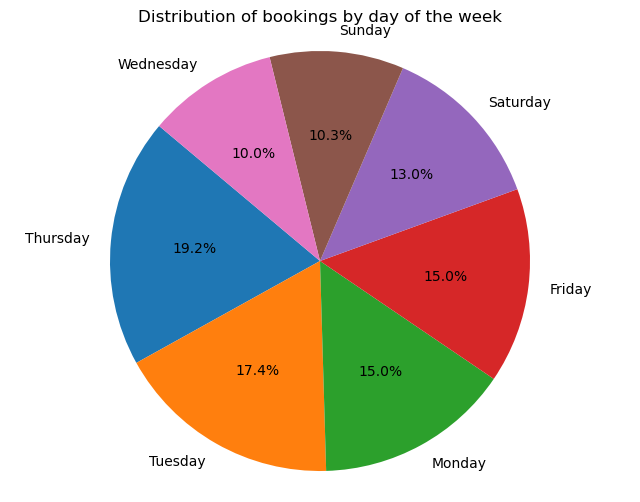

In [39]:
# Extract day of the week(Monday=0,Sunday=6)
bookings_df['day_of_week']=bookings_df['booking_time'].dt.dayofweek

# Map day_of_week to actual day names:
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
bookings_df['day_name']= bookings_df['day_of_week'].map(lambda x: day_names[x])

#count bookings per day:
bookings_per_day = bookings_df['day_name'].value_counts()

#Determine the day(s) with the highest bookings
max_bookings= bookings_per_day.max()
days_with_max_bookings = bookings_per_day[bookings_per_day == max_bookings].index.tolist()

#Print the result
print(f"Days with the highest number of bookings: {', '.join(days_with_max_bookings)}")

#Plotting the pie chart:
plt.figure(figsize = (8, 6))
plt.pie(bookings_per_day, labels = bookings_per_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of bookings by day of the week')
plt.axis('equal')
plt.show()

#### 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [40]:
# Groupby service _name and calculate total bookings and total GBV:
service_stats= bookings_df.groupby('service_name').agg({
    'booking_id': 'count', # Total number of bookings
    'INR_Amount': 'sum'
}).rename(columns={
    'booking_id': 'Total bookings',
    'INR_Amount': 'Total GBV (INR)'
}).reset_index()

#Display the results:
print(service_stats)

  service_name  Total bookings  Total GBV (INR)
0      GOIBIBO             186       5897637.97
1          MMT              48        665669.08
2        YATRA             105       3378702.13


### 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [41]:
# Filter customers with more than one booking:
customers_with_multiple_bookings = bookings_df['customer_id'].value_counts()
customers_with_multiple_bookings = customers_with_multiple_bookings[customers_with_multiple_bookings > 1].index.tolist()

filtered_bookings = bookings_df[bookings_df['customer_id'].isin(customers_with_multiple_bookings)]

# Group by from_city and to_city, calculate total bookings
route_stats = filtered_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='total_bookings')

# Find the most booked route
most_booked_route = route_stats.loc[route_stats['total_bookings'].idxmax()]

# Display the result
print(f"The most booked route for customers with more than one booking is from {most_booked_route['from_city']} to {most_booked_route['to_city']}.")

The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France.


### 6.Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [42]:
# Filter cities with at least 5 departures
departure_counts = bookings_df['from_city'].value_counts()
valid_cities = departure_counts[departure_counts >= 5].index.tolist()

filtered_bookings = bookings_df[bookings_df['from_city'].isin(valid_cities)]

# Calculate average days_to_departure for each city
city_stats = filtered_bookings.groupby('from_city')['days_to_departure'].mean().reset_index()

# Sort cities by average days_to_departure and get top 3
top_departure_cities = city_stats.sort_values(by='days_to_departure').head(3)

# Display the result
print("Top 3 departure cities with most advance bookings:")
for idx, row in top_departure_cities.iterrows():
    print(f"{row['from_city']}: Average days to departure = {row['days_to_departure']:.2f} days")

Top 3 departure cities with most advance bookings:
Rāja Sānsi: Average days to departure = 8.82 days
Ahmedabad: Average days to departure = 11.75 days
Delhi: Average days to departure = 12.76 days


### 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation


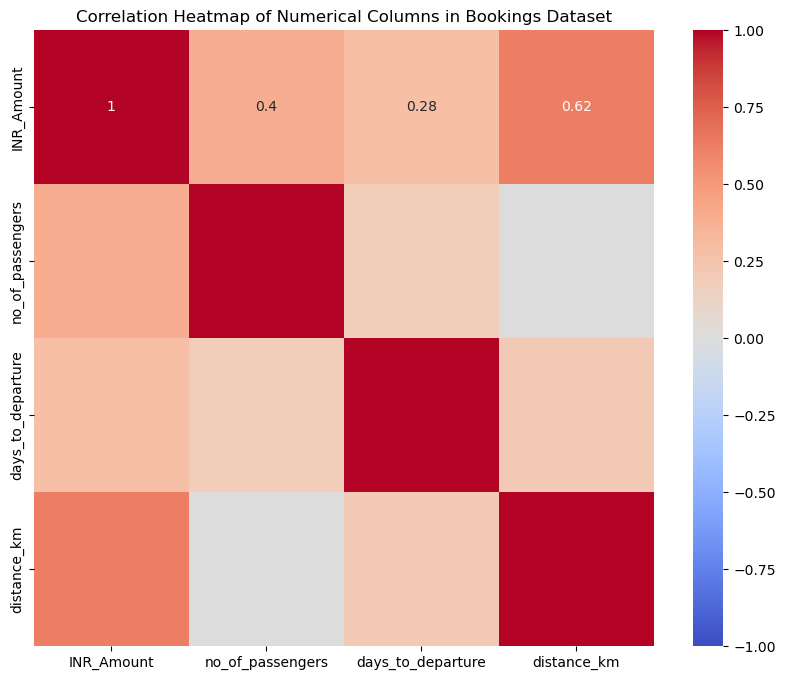

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'INR_Amount') with correlation coefficient 1.00


In [43]:
numerical_columns = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']

# Calculate correlation matrix
correlation_matrix = bookings_df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns in Bookings Dataset')
plt.show()

# Find pair of numerical columns with maximum correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_corr_pair = max_corr.idxmax()

# Display the result
print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair} with correlation coefficient {max_corr[max_corr_pair]:.2f}")

### 8.For each service, which is the most used device type for making bookings on the platform?

In [44]:
service_device_stats = bookings_df.groupby(['service_name', 'device_type_used']).size().reset_index(name='total_bookings')

# Find the most used device type for each service
idx = service_device_stats.groupby(['service_name'])['total_bookings'].transform("max") == service_device_stats['total_bookings']
most_used_devices = service_device_stats[idx]

# Display the result
print("Most used device type for each service:")
for idx, row in most_used_devices.iterrows():
    print(f"Service: {row['service_name']}, Most used device type: {row['device_type_used']} with {row['total_bookings']} bookings")

Most used device type for each service:
Service: GOIBIBO, Most used device type: IOS with 70 bookings
Service: MMT, Most used device type: Desktop with 30 bookings
Service: YATRA, Most used device type: Desktop with 51 bookings


### 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type


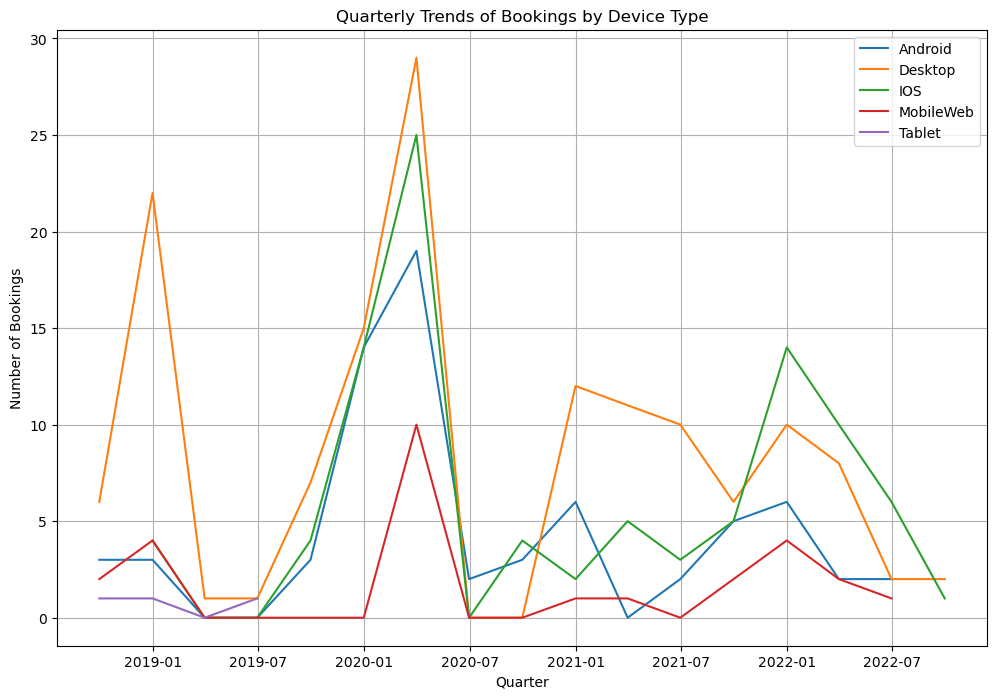

In [45]:
# Set booking_time as index
bookings_df.set_index('booking_time', inplace=True)

# Group by device_type_used and resample to quarterly frequency
quarterly_device_stats = bookings_df.groupby('device_type_used').resample('Q').size().unstack(level=0)

# Plotting quarterly trends
plt.figure(figsize=(12, 8))
for device_type in quarterly_device_stats.columns:
    plt.plot(quarterly_device_stats.index, quarterly_device_stats[device_type], label=device_type)

plt.title('Quarterly Trends of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.show()

***10. Consider the following example:
12 customers performed a total of 100 searches but
only a few of them performed 10 bookings in total. 
searches=100 bookings=10 customers=12 
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above 
information/context, answer the following: 
• What is the average oBSR for each month of the year? 
• What is the average oBSR for each day of the week? 
• Plot a time series of oBSR on all the given data.***

In [53]:
if "booking_time" in bookings_df.columns and "search_time" in sessions_df.columns:

    bookings_df = bookings_df.dropna(subset=['booking_time'])
    sessions_df = sessions_df.dropna(subset=['search_time'])

    # Extract year, month, and day of the week from booking_time and search_time
    bookings_df['year_month'] = bookings_df['booking_time'].dt.to_period('M')
    bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()
    sessions_df['year_month'] = sessions_df['search_time'].dt.to_period('M')
    sessions_df['day_of_week'] = sessions_df['search_time'].dt.day_name()

    # Calculate the total number of bookings and searches per month
    monthly_bookings = bookings_df.groupby('year_month')['booking_id'].nunique().reset_index(name='monthly_bookings')
    monthly_searches = sessions_df.groupby('year_month')['search_id'].nunique().reset_index(name='monthly_searches')

    # Merge the monthly bookings and searches DataFrames
    monthly_data = pd.merge(monthly_bookings, monthly_searches, on='year_month')

    # Calculate the average oBSR for each month
    monthly_data['oBSR'] = monthly_data['monthly_bookings'] / monthly_data['monthly_searches']

    # Calculate the total number of bookings and searches per day of the week
    weekly_bookings = bookings_df.groupby('day_of_week')['booking_id'].nunique().reset_index(name='weekly_bookings')
    weekly_searches = sessions_df.groupby('day_of_week')['search_id'].nunique().reset_index(name='weekly_searches')

    # Merge the weekly bookings and searches DataFrames
    weekly_data = pd.merge(weekly_bookings, weekly_searches, on='day_of_week')
    # Calculate the average oBSR for each day of the week
    weekly_data['oBSR'] = weekly_data['weekly_bookings'] / weekly_data['weekly_searches']

    # Merge the bookings and sessions DataFrames
    merged_df = pd.merge(bookings_df, sessions_df, on='booking_id', how='inner')

    # Calculate the daily oBSR
    bookings_df['booking_date'] = bookings_df['booking_time'].dt.date
    sessions_df['search_date'] = sessions_df['search_time'].dt.date
    daily_bookings = bookings_df.groupby('booking_date')['booking_id'].nunique().reset_index(name='daily_bookings')
    daily_searches = sessions_df.groupby('search_date')['search_id'].nunique().reset_index(name='daily_searches')
    daily_data = pd.merge(daily_bookings, daily_searches, left_on='booking_date', right_on='search_date', how='outer')
    daily_data['oBSR'] = daily_data['daily_bookings'] / daily_data['daily_searches']

    # Filter out rows with NaN values in oBSR
    daily_data = daily_data.dropna(subset=['oBSR'])

    # Plot the time series of oBSR on all given dates
    plt.figure(figsize=(10, 6))
    plt.plot(daily_data['booking_date'], daily_data['oBSR'], marker='o', linestyle='-')
    plt.title('Time Series of oBSR')
    plt.xlabel('Date')
    plt.ylabel('oBSR')
    plt.grid(True)
    plt.show()

    print("Average oBSR for each month of the year:")
    print(monthly_data[['year_month', 'oBSR']])
    print("\nAverage oBSR for each day of the week:")
    print(weekly_data[['day_of_week', 'oBSR']])
else:
    print("Ensure that 'booking_time' exists in bookings.csv and 'search_time' exists in sessions.csv")         


Ensure that 'booking_time' exists in bookings.csv and 'search_time' exists in sessions.csv


In [52]:
bookings_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day_of_week,day_name
booking_time,,,,,,,,,,,,,,
2020-02-05 16:12:08+00:00,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,Desktop,2565.28,MMT,1.0,10.0,747.8,2,Wednesday
2018-11-21 08:21:47+00:00,customer_303,booking_156,Delhi,India,Brussels,Belgium,Android,23120.00,YATRA,1.0,1.0,6701.5,2,Wednesday
2019-12-16 22:54:58+00:00,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,Android,25717.60,YATRA,1.0,32.0,7712.0,0,Monday
2021-10-29 12:25:38+00:00,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,4,Friday
2020-08-11 16:09:10+00:00,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,1,Tuesday
